In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
import time
import sys
from def_conv_crs_2h import*
from numpy import*
y_lbl=50
x_lbl =50


ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=3.  # dimensione linea fit


/home/zackmrc/Documenti/git_project/SIDIS pol/def_convolution_sidis_PV17


In [2]:
pol = polarization(0.25)

In [3]:
pol.g_k = 'PV17'
pol.scale =10.58
pol.mass = 1.115
pol.bmax = 0.6
pol.charm = 'no'

pol.mdl_den = 'pwr_lw_star'
pol.mdl_num = 'gauss'


In [4]:
pol.denominator('lbd','PP',0.4,0.1)
#pol.ratio('lbd','PP',)

0.03246677704633319

In [5]:
gauss = pd.read_csv('fit_parameters/fit_hadron_coef_0.25_chi_1.192__True_gk_ll_lgm.csv')

In [6]:
gauss

,NUP,NDO,NST,NSEA,AUP,ADO,AST,ASEA,BUP,BDO,BST,BSEA,PP,MSS,coef,chi_sq
0,0.093417,-0.100018,-0.11673,-0.055013,0.0,0.0,2.193973,0.0,3.472057,0.0,0.0,2.319106,0.066397,0.0,0.25,1.192


In [7]:
gauss.NUP

0    0.093417
Name: NUP, dtype: float64

In [8]:
f_prm=arange(0.,18.,1.)
f_prm[0] = gauss.NUP
f_prm[1] = gauss.NDO#par[0]  #do
f_prm[2] = gauss.NST  #par[0]      #st
f_prm[3] = gauss.NSEA  #par[0]      #upb
f_prm[4] = f_prm[3] #par[0]      #dob
f_prm[5] = f_prm[3] # par[0]      #stb
#¯¯¯¯¯¯
f_prm[6] = 0 #par[0]      #aup
f_prm[7] = 0 #par[0]      #ado
f_prm[8] = gauss.AST  # par[0]      #ast
f_prm[9] = 0# par[0]      #aupb
f_prm[10] = f_prm[9] #par[0]      #adob
f_prm[11] = f_prm[9] #par[0]      #astb
#¯#¯¯¯¯¯¯¯
f_prm[12] = gauss.BUP #par[0]      #bup
f_prm[13] = 0 #par[0]      #bdo
f_prm[14] = 0# par[0]      #bst
f_prm[15] = gauss.BSEA #par[0]      #bupb
f_prm[16] = f_prm[15] #par[0]      #bdob
f_prm[17] = f_prm[15] # par[0]      #bstb
pp = np.float64(gauss.PP)
#pp=gauss.PP.astype(float)

In [9]:
type(gauss.PP)
a=gauss.PP.astype(float)
print(a)
print(pp)


0    0.066397
Name: PP, dtype: float64
0.06639720163678299


In [10]:
a,b=pol.numerator_bts('lbd','PP',0.3,0.1,f_prm,pp,0.,1.4)

In [11]:
a

0.0002512002511467096

In [12]:
b

0.0010252257446681278

In [13]:
bts=linspace(0.1,2.,30)
a,b = zeros(len(bts)),  zeros(len(bts))
i=0
for bt in bts:
    a[i],b[i]=pol.numerator_bts('lbd','PP',0.3,0.1,f_prm,pp,0.,bt)
    i+=1

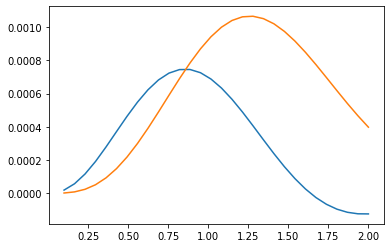

In [14]:
plot(bts,a)
plot(bts,b)

In [15]:
pr = np.array([])

In [16]:
pr = np.append(pr,2)

In [17]:
pr

array([2.])

In [18]:
pol.numerator('lbd','PP',0.3,0.1,f_prm,pp,0.)

0.0011792695147632556

In [19]:
pol.ratio('lbd','PP',0.3,0.1,f_prm,pp,0.)

0.017506222158041995

In [30]:
zs = linspace(0.25,0.7,30)

In [31]:
pls=zeros(len(zs))
i=0
for zz in zs:
    pls[i]= pol.ratio('lbd_b','PP',zz,0.2,f_prm,pp,0.)
    i+=1

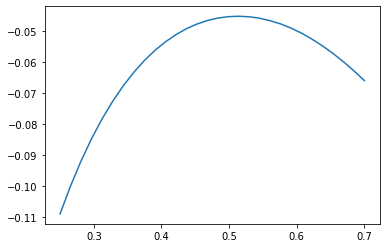

In [32]:
plot(zs,pls)